In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
#shape of numpy arrays
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")
# x_train( 60k images of 28*28 dimention) Pixel values range from 0 to 255.
# y_train: digit labels (integers in range 0-9)

Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test  (10000, 28, 28)
Shape of y_test  (10000,)


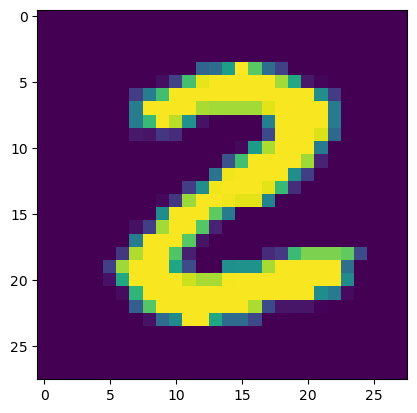

2


In [7]:
#displaying the image
plt.imshow(x_train[25])
plt.show()

#printing corresponding label
print(y_train[25])

In [9]:
#unique values in Y_rain
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
#scaling the values
x_train = x_train/255
x_test = x_test/255
# 0/255 = 255
#255/255 = 1 maximum value

In [13]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu',name='L1'),
    keras.layers.Dense(50,activation='relu',name='L2'),
    keras.layers.Dense(10,activation='softmax',name='L3')
])

D:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer="sgd",loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [19]:
# Training the model
history = model.fit(x_train, y_train,
              batch_size=30,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6782 - loss: 1.1374 - val_accuracy: 0.9061 - val_loss: 0.3272
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9062 - loss: 0.3256 - val_accuracy: 0.9239 - val_loss: 0.2672
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9230 - loss: 0.2677 - val_accuracy: 0.9329 - val_loss: 0.2329
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9329 - loss: 0.2305 - val_accuracy: 0.9385 - val_loss: 0.2145
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9428 - loss: 0.2054 - val_accuracy: 0.9449 - val_loss: 0.1862
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9445 - loss: 0.1918 - val_accuracy: 0.9480 - val_loss: 0.1730
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9518 - loss: 0.1682 - val_accuracy: 0.9509 - val_loss: 0.1587
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9559 - loss: 0.1544 - 

<Axes: >

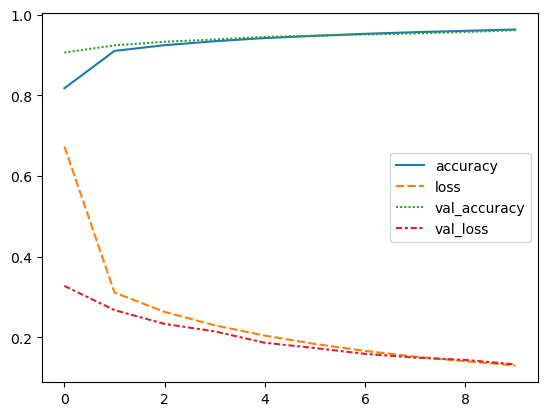

In [21]:
import seaborn as sns
sns.lineplot(model.history.history)

In [23]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9531 - loss: 0.1566


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


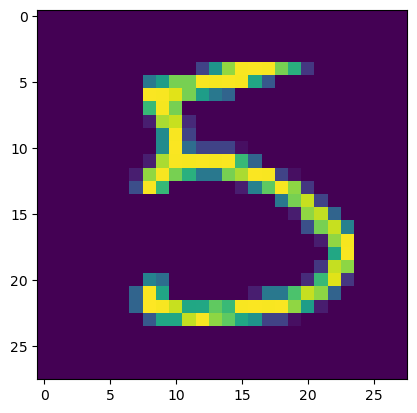

5


In [25]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[15])
plt.show()
print(np.argmax(predicted_value[15], axis=0))